# Gaussian Process Classification Demo with Hyperparameter Optimization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.optim import SGD
from tqdm.auto import tqdm
from binary_laplace_gpc import BinaryLaplaceGPC

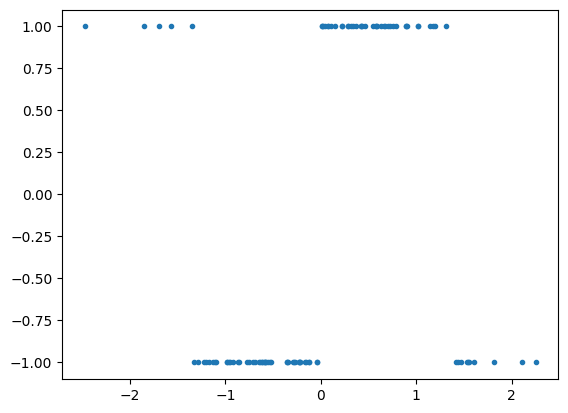

In [2]:
device = 'cuda:1' # 'cpu'
X = torch.randn(100,1)
f = torch.sin(X * 3 * np.pi/4).flatten()
y = (f > 0.).int() * 2 - 1
y = y[:,None]
grid = torch.linspace(-5, 5, 500)[:,None]
plt.plot(X.flatten(), y.flatten(), '.')

## Logistic Likelihood

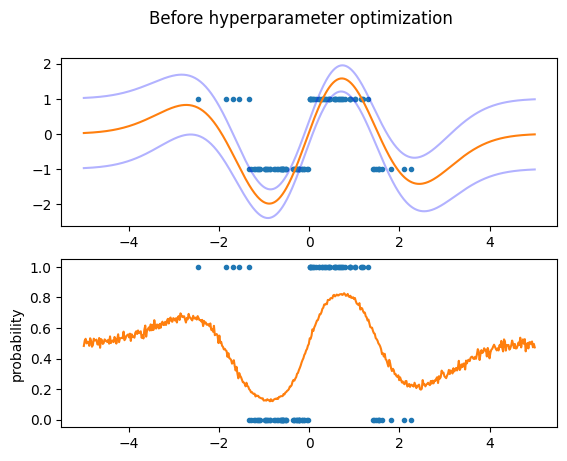

In [7]:
gp = BinaryLaplaceGPC(
    length_scale=1,
    amplitude_scale=1,
    likelihood_func='Logistic',
    eps=0.0001,
    n_samples=100
).to(device)
gp.fit(X.to(device), y.to(device))
mu, var, pi = gp.forward(grid.to(device))
pi = pi.detach().cpu().numpy().flatten()
mu = mu.detach().cpu().numpy().flatten()
std = torch.sqrt(var).detach().cpu().numpy().flatten()
plt.suptitle('Before hyperparameter optimization');
plt.subplot(211)
plt.plot(X.flatten(), y, '.')
plt.plot(grid.flatten(), mu)
plt.plot(grid.flatten(), mu + std, color='blue', alpha=0.3)
plt.plot(grid.flatten(), mu - std, color='blue', alpha=0.3)
plt.subplot(212)
plt.plot(X.flatten(), (y + 1)/2, '.')
plt.ylabel("probability")
plt.plot(grid.flatten(), pi)

  0%|          | 0/100 [00:00<?, ?it/s]

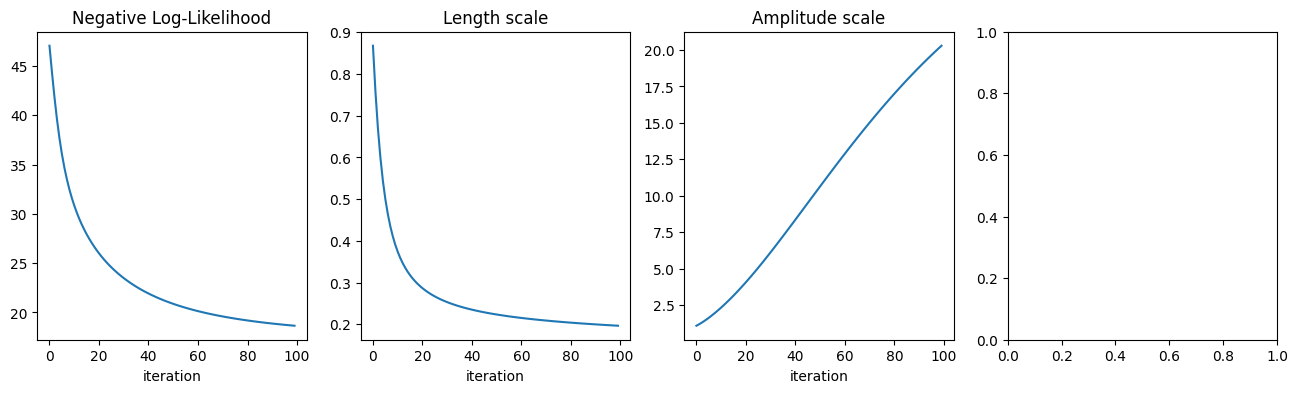

In [8]:
opt = SGD(gp.parameters(), lr=0.01)
l_loss = []; l_length = []; l_noise = []; l_amp = []
for i in tqdm(range(100)):
    d_train = gp.train_step(X.to(device), y.to(device), opt)
    l_loss.append(d_train['loss'])
    l_length.append(d_train['length'])
    l_amp.append(d_train['amplitude'])
fig, axs = plt.subplots(ncols=4, figsize=(16,4))
axs[0].plot(l_loss); axs[0].set_title('Negative Log-Likelihood'); axs[0].set_xlabel('iteration')
axs[1].plot(torch.stack(l_length)); axs[1].set_title('Length scale'); axs[1].set_xlabel('iteration')
axs[2].plot(torch.stack(l_amp)); axs[2].set_title('Amplitude scale'); axs[2].set_xlabel('iteration');

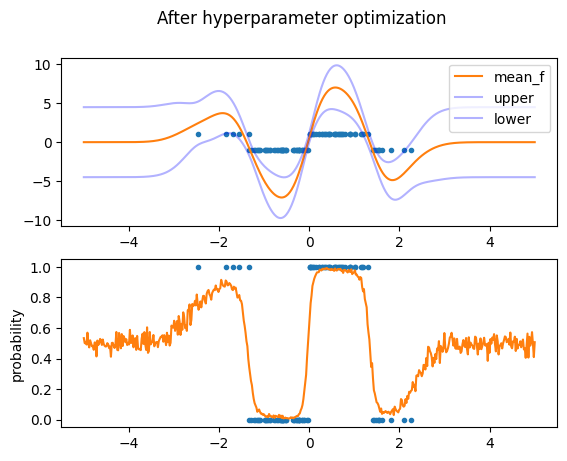

In [9]:
mu, var, pi = gp.forward(grid.to(device))
pi = pi.detach().cpu().numpy().flatten()
mu = mu.detach().cpu().numpy().flatten()
std = torch.sqrt(var).detach().cpu().numpy().flatten()
plt.suptitle('After hyperparameter optimization')
plt.subplot(211)
plt.plot(X.flatten(), y, '.')
plt.plot(grid.flatten(), mu, label='mean_f')
plt.plot(grid.flatten(), mu + std, label='upper', color='blue', alpha=0.3)
plt.plot(grid.flatten(), mu - std, label='lower', color='blue', alpha=0.3)
plt.legend()
plt.subplot(212)
plt.plot(X.flatten(), (y + 1)/2, '.')
plt.ylabel("probability")
plt.plot(grid.flatten(), pi)

## Cumulative Gaussian Likelihood

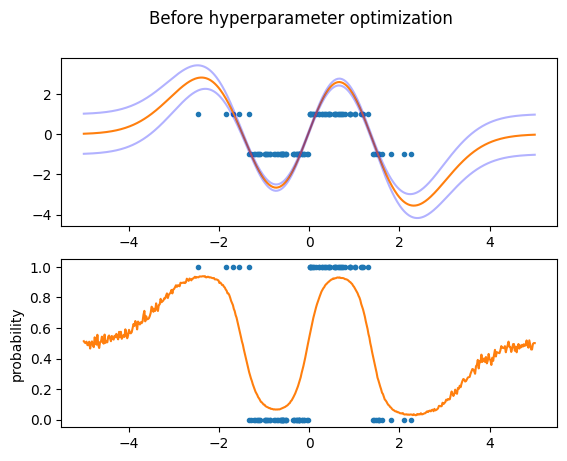

In [10]:
gp = BinaryLaplaceGPC(
    length_scale=1,
    amplitude_scale=1.,
    likelihood_func='CumulativeGaussian',
    eps=0.0001,
    n_samples=100
).to(device)
gp.fit(X.to(device), y.to(device))
mu, var, pi = gp.forward(grid.to(device))
pi = pi.detach().cpu().numpy().flatten()
mu = mu.detach().cpu().numpy().flatten()
std = torch.sqrt(var).detach().cpu().numpy().flatten()
plt.suptitle('Before hyperparameter optimization');
plt.subplot(211)
plt.plot(X.flatten(), y, '.')
plt.plot(grid.flatten(), mu)
plt.plot(grid.flatten(), mu + std, color='blue', alpha=0.3)
plt.plot(grid.flatten(), mu - std, color='blue', alpha=0.3)
plt.subplot(212)
plt.plot(X.flatten(), (y + 1)/2, '.')
plt.ylabel("probability")
plt.plot(grid.flatten(), pi)

  0%|          | 0/100 [00:00<?, ?it/s]

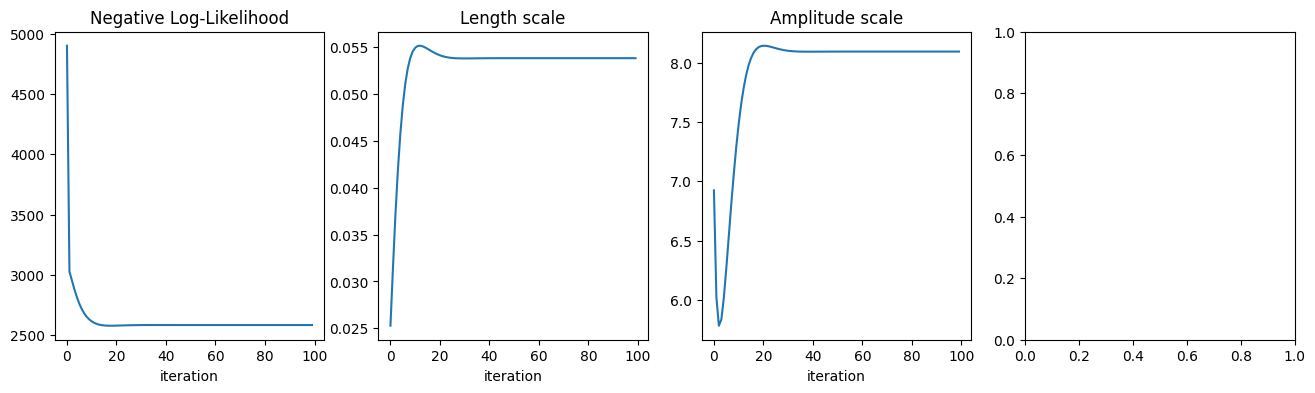

In [11]:
opt = SGD(gp.parameters(), lr=0.001)
l_loss = []; l_length = []; l_noise = []; l_amp = []
for i in tqdm(range(100)):
    d_train = gp.train_step(X.to(device), y.to(device), opt)
    l_loss.append(d_train['loss'])
    l_length.append(d_train['length'])
    l_amp.append(d_train['amplitude'])
fig, axs = plt.subplots(ncols=4, figsize=(16,4))
axs[0].plot(l_loss); axs[0].set_title('Negative Log-Likelihood'); axs[0].set_xlabel('iteration')
axs[1].plot(torch.stack(l_length)); axs[1].set_title('Length scale'); axs[1].set_xlabel('iteration')
axs[2].plot(torch.stack(l_amp)); axs[2].set_title('Amplitude scale'); axs[2].set_xlabel('iteration');

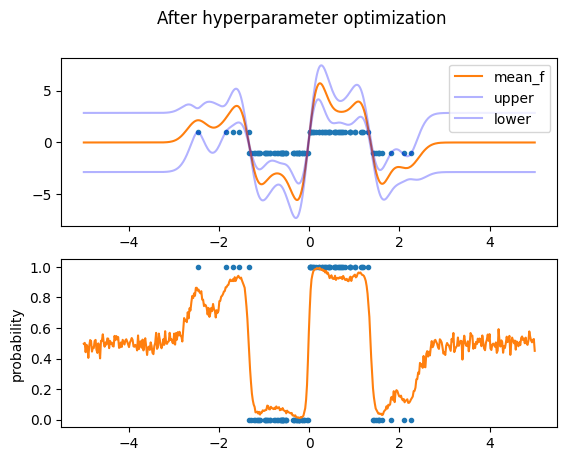

In [12]:
mu, var, pi = gp.forward(grid.to(device))
pi = pi.detach().cpu().numpy().flatten()
mu = mu.detach().cpu().numpy().flatten()
std = torch.sqrt(var).detach().cpu().numpy().flatten()
plt.suptitle('After hyperparameter optimization')
plt.subplot(211)
plt.plot(X.flatten(), y, '.')
plt.plot(grid.flatten(), mu, label='mean_f')
plt.plot(grid.flatten(), mu + std, label='upper', color='blue', alpha=0.3)
plt.plot(grid.flatten(), mu - std, label='lower', color='blue', alpha=0.3)
plt.legend()
plt.subplot(212)
plt.plot(X.flatten(), (y + 1)/2, '.')
plt.ylabel("probability")
plt.plot(grid.flatten(), pi)